In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [20]:
import random

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import fbeta_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
RANDOM_STATE = 25

Считайте датасет из файла train.csv (это данные о выживаемости на Титанике)

In [8]:
train = pd.read_csv("/content/train.csv")

In [9]:
train.fillna(0, inplace=True)

Поменяю классы местами, так как для меня целевой - невыжившие

In [10]:
train['Survived'] = 1 - train['Survived']

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [12]:
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train['Survived']

In [13]:
X['Sex'] = X['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [14]:
X['Sex'].value_counts()

,count
Sex,
0,577
1,314


In [16]:
X = pd.get_dummies(X)

In [17]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0,22.0,1,0,7.2500,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,True,False,False
2,3,3,1,26.0,0,0,7.9250,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,True
4,5,3,0,35.0,0,0,8.0500,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,False,False,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,False,True
888,889,3,1,0.0,1,2,23.4500,False,False,False,True
889,890,1,0,26.0,0,0,30.0000,False,True,False,False


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_STATE, stratify=y)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

Выберите и обоснуйте метрику для измерения качества (accuracy/precision/recall/f1-score/fbeta-score/roc-auc и т.д.). В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи, написав краткое обоснование (1-2 предложения) - 2 балла

Предположим, что для нас наиболее важным является предсказание того, что человек не выживет. Следовательно необходимо минимизировать предсказание класса 1, когда на самом деле ответом является 0. Мне кажется, что Recall - лучшая метрика в данном случае, так как она покажет, какую долю невыживших мы смогли бы определить. Нам важно не пропустить тот факт, что человек может не выжить:

Постройте бейзлайн и ML-модель классификации (LogisticRegression или любая другая, которая вам кажется подходящей) и оцените их качество с помощью выбранной метрики

За бейзлайн возьмем случайное предсказание выживаемости.

In [53]:
y_pred_random = np.random.randint(0, 2, size=X_test.shape[0])

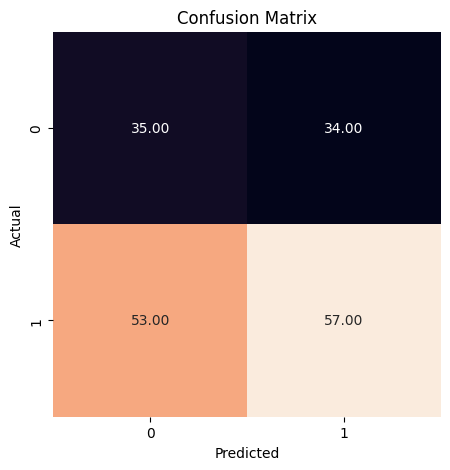

In [54]:
figsize = (5,5)

fig, ax = plt.subplots(figsize=figsize)
plt.title('Confusion Matrix')
hmap = sns.heatmap(confusion_matrix(y_test, y_pred_random), annot=True, ax=ax, cbar=False, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [55]:
lr = LogisticRegression(solver='lbfgs', max_iter=1500, random_state=RANDOM_STATE)
lr.fit(X_train, y_train);
y_pred_lr = lr.predict(X_test)

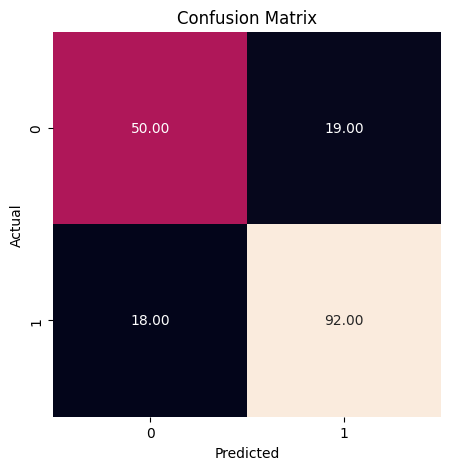

In [56]:
figsize = (5,5)

fig, ax = plt.subplots(figsize=figsize)
plt.title('Confusion Matrix')
hmap = sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, ax=ax, cbar=False, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [67]:
rf_base = RandomForestClassifier(random_state=RANDOM_STATE)
rf_base.fit(X_train, y_train)
y_pred_rf_base = rf_base.predict(X_test)

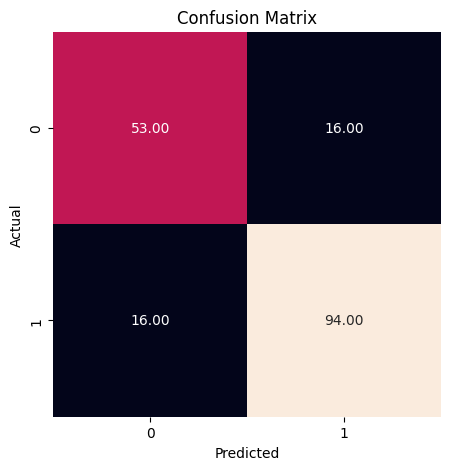

In [68]:
figsize = (5,5)

fig, ax = plt.subplots(figsize=figsize)
plt.title('Confusion Matrix')
hmap = sns.heatmap(confusion_matrix(y_test, y_pred_rf_base), annot=True, ax=ax, cbar=False, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [42]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [70]:
rf_grsearch = grid_search.best_estimator_.fit(X_train, y_train)
y_pred_rf = rf_grsearch.predict(X_test)

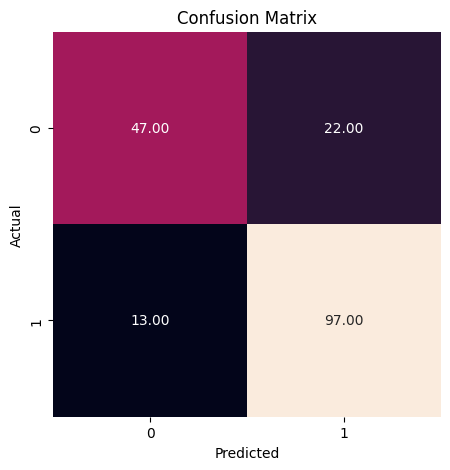

In [71]:
figsize = (5,5)

fig, ax = plt.subplots(figsize=figsize)
plt.title('Confusion Matrix')
hmap = sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, ax=ax, cbar=False, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Считаем выбранную метрику - Recall

In [72]:
print(f'Recall для Random: {recall_score(y_test, y_pred_random)}')
print(f'Recall для LR: {recall_score(y_test, y_pred_lr)}')
print(f'Recall для RF_base: {recall_score(y_test, y_pred_rf_base)}')
print(f'Recall для RF: {recall_score(y_test, y_pred_rf)}')

Recall для Random: 0.5181818181818182
Recall для LR: 0.8363636363636363
Recall для RF_base: 0.8545454545454545
Recall для RF: 0.8818181818181818


Так как для нас важнее Recall, возьмем f1-betta меру и дадим больший вес нужной метрике:

In [73]:
print(f'F1-betta для Random: {fbeta_score(y_test, y_pred_random, beta=2)}')
print(f'F1-betta для LR: {fbeta_score(y_test, y_pred_lr, beta=2)}')
print(f'F1-betta для RF_base: {fbeta_score(y_test, y_pred_rf_base, beta=2)}')
print(f'F1-betta для RF: {fbeta_score(y_test, y_pred_rf, beta=2)}')

F1-betta для Random: 0.536723163841808
F1-betta для LR: 0.8348457350272233
F1-betta для RF_base: 0.8545454545454545
F1-betta для RF: 0.8676207513416816


In [74]:
print(f'Accuracy для Random: {accuracy_score(y_test, y_pred_random)}')
print(f'Accuracy для LR: {accuracy_score(y_test, y_pred_lr)}')
print(f'Accuracy для RF_base: {accuracy_score(y_test, y_pred_rf_base)}')
print(f'Accuracy для RF: {accuracy_score(y_test, y_pred_rf)}')

Accuracy для Random: 0.5139664804469274
Accuracy для LR: 0.7932960893854749
Accuracy для RF_base: 0.8212290502793296
Accuracy для RF: 0.8044692737430168


In [75]:
print(f'Presicion для Random: {precision_score(y_test, y_pred_random)}')
print(f'Presicion для LR: {precision_score(y_test, y_pred_lr)}')
print(f'Presicion для RF_base: {precision_score(y_test, y_pred_rf_base)}')
print(f'Presicion для RF: {precision_score(y_test, y_pred_rf)}')

Presicion для Random: 0.6263736263736264
Presicion для LR: 0.8288288288288288
Presicion для RF_base: 0.8545454545454545
Presicion для RF: 0.8151260504201681
